# Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
oo = pd.read_csv('../Data/olympics.csv',skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Plot the total number of medals awarded at each of the Olympic games throughout history.

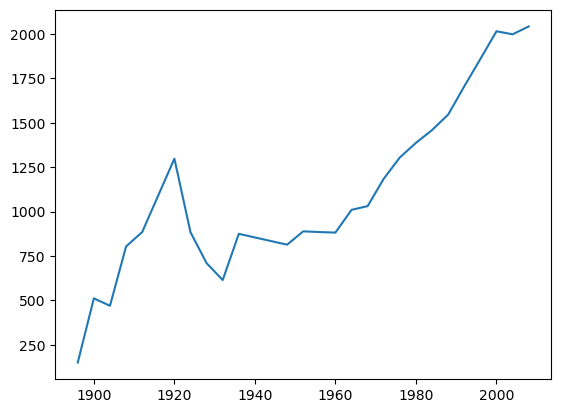

In [5]:
oo.Edition.value_counts().sort_index().plot();

### Which countries did not win a medal in the 2008 Olympics? How many countries were there?

In [16]:
lo = oo[oo.Edition == 2008]
lo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [17]:
noc = pd.read_csv('../Data/Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv')
noc.head()

,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra


In [18]:
noc[noc['Country'] != noc['Country.1']]

,Country,Int Olympic Committee code,ISO code,Country.1


In [19]:
noc.set_index('Int Olympic Committee code',inplace=True)
noc.head()

,Country,ISO code,Country.1
Int Olympic Committee code,,,
AFG,Afghanistan,AF,Afghanistan
ALB,Albania,AL,Albania
ALG,Algeria,DZ,Algeria
ASA,American Samoa*,AS,American Samoa*
AND,Andorra,AD,Andorra


In [20]:
medal_2008 = lo.NOC.value_counts()
medal_2008

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
SUD      1
EGY      1
MDA      1
TOG      1
MRI      1
Name: NOC, Length: 86, dtype: int64

In [21]:
noc['medal_2008'] = medal_2008
noc.head()

,Country,ISO code,Country.1,medal_2008
Int Olympic Committee code,,,,
AFG,Afghanistan,AF,Afghanistan,1.0
ALB,Albania,AL,Albania,NaN
ALG,Algeria,DZ,Algeria,2.0
ASA,American Samoa*,AS,American Samoa*,NaN
AND,Andorra,AD,Andorra,NaN


In [22]:
noc[noc.medal_2008.isnull()]

,Country,ISO code,Country.1,medal_2008
Int Olympic Committee code,,,,
ALB,Albania,AL,Albania,NaN
ASA,American Samoa*,AS,American Samoa*,NaN
AND,Andorra,AD,Andorra,NaN
ANG,Angola,AO,Angola,NaN
ANT,Antigua and Barbuda,AG,Antigua and Barbuda,NaN
...,...,...,...,...
URU,Uruguay,UY,Uruguay,NaN
VAN,Vanuatu,VU,Vanuatu,NaN
ISV,Virgin Islands*,VI,Virgin Islands*,NaN
